In [178]:
from oneargopy.OneArgo import Argo
from argopy import DataFetcher as ArgoDataFetcher
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cmocean
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from argopy import ArgoFloat
import gsw
import numpy as np

In [22]:
argo = Argo('argo_config.json')

Starting initialize process...
Your current download settings are: 
[DownloadSettings] -> 
Base Directory: ., 
Subdirectories: ['Index', 'Meta', 'Tech', 'Traj', 'Profiles'], 
Index Files: ['ar_index_global_traj.txt', 'ar_index_global_tech.txt', 'ar_index_global_meta.txt', 'ar_index_global_prof.txt', 'argo_synthetic-profile_index.txt'], 
Verbose Setting: True, 
Max Attempts: 5, 
Keep Index In Memory: True, 
Float Type: bgc

Your current source settings are: 
[Source Settings] -> 
Hosts: ['https://data-argo.ifremer.fr/', 'https://usgodae.org/ftp/outgoing/argo/'], 
Available Variables: None, 
Data Assimilation Centers: None

Checking for subdirectories...
The Index directory already exists
The Meta directory already exists
The Tech directory already exists
The Traj directory already exists
The Profiles directory already exists

ar_index_global_traj.txt does not need to be updated yet.
ar_index_global_tech.txt does not need to be updated yet.
ar_index_global_meta.txt does not need to be up

/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:611: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values='data_type').fillna(0).infer_objects(copy=False).astype('int8')


Filling in source settings information...
Marking Parameters with their data mode...
Filling in source settings information...
Marking bgc floats in prof_index dataframe...
Creating float_stats dataframe...

20010 floats with 3295930 profiles found.
2772 BGC floats with 380373 profiles found.
Initialization is finished




In [23]:
df = pd.read_csv('first_profile_5906583.csv')

In [24]:
df

,Unnamed: 0,WMOID,CYCLE_NUMBER,DIRECTION,DATE,DATE_QC,LATITUDE,LONGITUDE,POSITION_QC,PRES,...,NITRATE,NITRATE_QC,NITRATE_ADJUSTED,NITRATE_ADJUSTED_QC,NITRATE_ADJUSTED_ERROR,PH_IN_SITU_TOTAL,PH_IN_SITU_TOTAL_QC,PH_IN_SITU_TOTAL_ADJUSTED,PH_IN_SITU_TOTAL_ADJUSTED_QC,PH_IN_SITU_TOTAL_ADJUSTED_ERROR
0,0,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,4.40,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
1,1,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,6.40,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
2,2,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,7.53,...,23.122090,3.0,25.124890,1.0,1.328834,8.040375,3.0,8.067884,1.0,0.015261
3,3,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,8.00,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
4,4,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,9.50,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59946,59946,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1499.60,...,26.416222,3.0,32.370422,1.0,1.490185,7.906227,3.0,7.891226,1.0,0.019830
59947,59947,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1600.27,...,26.295538,3.0,32.249737,1.0,1.490398,7.910443,3.0,7.895441,1.0,0.019834
59948,59948,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1699.83,...,26.359535,3.0,32.313736,1.0,1.490695,7.910639,3.0,7.895635,1.0,0.019839
59949,59949,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1799.47,...,26.285639,3.0,32.239838,1.0,1.491098,7.909321,3.0,7.894314,1.0,0.019845


In [31]:
#convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'],format = 'mixed')
#subset data with good QC only
qc_flags = [1,2,8]
df_clean = df[df['CHLA_ADJUSTED_QC'].isin(qc_flags) & df['PRES_ADJUSTED_QC'].isin(qc_flags) & df['TEMP_ADJUSTED_QC'].isin(qc_flags) & df['PSAL_ADJUSTED_QC'].isin(qc_flags)]


In [30]:
abs_sal = gsw.conversions.SA_from_SP(df['PSAL'], df['PRES'], df['LONGITUDE'], df['LATITUDE'])

In [32]:
cons_temp = gsw.CT_from_t(abs_sal, df['TEMP'], df['PRES'])

In [34]:
sigma0 = gsw.sigma0(abs_sal, cons_temp)

In [35]:
p_density = sigma0 + 1000

In [149]:
# Specify the cycles you want to include in a list
target_cycles_1 = [1]

# Create a mask using isin()
mask_multiple_1 = df['CYCLE_NUMBER'].isin(target_cycles_1)

# Apply the mask
multiple_cycles_subset_1 = df[mask_multiple_1]

In [265]:
# calculating absolute salinity
abs_sal_1 = gsw.conversions.SA_from_SP(multiple_cycles_subset_1['PSAL'], multiple_cycles_subset_1['PRES'], multiple_cycles_subset_1['LONGITUDE'], multiple_cycles_subset_1['LATITUDE'])

In [266]:
# calculating conservative temperature
cons_temp_1 = gsw.CT_from_t(abs_sal_1, multiple_cycles_subset_1['TEMP'], multiple_cycles_subset_1['PRES'])

In [142]:
sigma0_1 = gsw.sigma0(abs_sal_1, cons_temp_1)

In [267]:
#calculating potential density
p_density_1 = sigma0_1 + 1000

Text(0.5, 1.0, 'Potential Density Cycle 1')

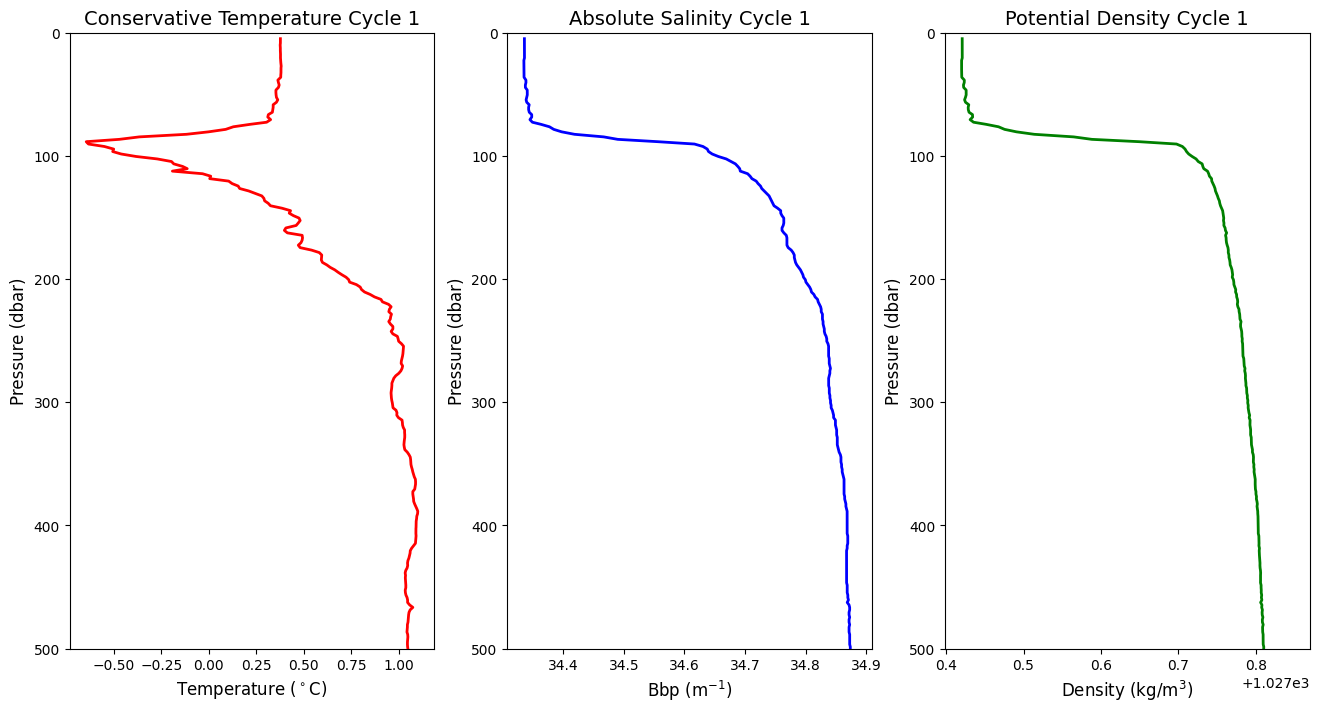

In [135]:
fig = plt.figure(figsize=(16,8))


ax = fig.add_subplot(131)

ax.set_ylim (0, 500)
ax.invert_yaxis()

plot = ax.plot(cons_temp_1, multiple_cycles_subset['PRES_ADJUSTED'], lw=2, c='red')

ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Conservative Temperature Cycle 1', fontsize=14)


ax = fig.add_subplot(132)

ax.set_ylim (0, 500)
ax.invert_yaxis()

plot = ax.plot(abs_sal_1, multiple_cycles_subset['PRES_ADJUSTED'], lw=2, c='blue')

ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Absolute Salinity Cycle 1', fontsize=14)


ax = fig.add_subplot(133)

ax.set_ylim (0, 500)
ax.invert_yaxis()

plot = ax.plot(p_density_1, multiple_cycles_subset['PRES_ADJUSTED'], lw=2, c='green')

ax.set_xlabel(r'Density ($\mathregular{kg/m^3}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Potential Density Cycle 1', fontsize=14)

In [120]:
# Specify the cycles you want to include in a list
target_cycles_100 = [100]

# Create a mask using isin()
mask_multiple_100 = df['CYCLE_NUMBER'].isin(target_cycles_100)

# Apply the mask
multiple_cycles_subset_100 = df[mask_multiple_100]

In [268]:
# calculating absolute salinity
abs_sal_100 = gsw.conversions.SA_from_SP(multiple_cycles_subset_100['PSAL'], multiple_cycles_subset_100['PRES'], multiple_cycles_subset_100['LONGITUDE'], multiple_cycles_subset_100['LATITUDE'])

In [270]:
# calculating conservative temperature
cons_temp_100 = gsw.CT_from_t(abs_sal_100, multiple_cycles_subset_100['TEMP'], multiple_cycles_subset_100['PRES'])

In [144]:
sigma0_100 = gsw.sigma0(abs_sal_100, cons_temp_100)

In [273]:
#calculating potential density
p_density_100 = sigma0_100 + 1000

In [139]:
# Specify the cycles you want to include in a list
target_cycles_50 = [50]

# Create a mask using isin()
mask_multiple_50 = df['CYCLE_NUMBER'].isin(target_cycles_50)

# Apply the mask
multiple_cycles_subset_50 = df[mask_multiple_50]

In [269]:
# calculating absolute salinity
abs_sal_50 = gsw.conversions.SA_from_SP(multiple_cycles_subset_50['PSAL'], multiple_cycles_subset_50['PRES'], multiple_cycles_subset_50['LONGITUDE'], multiple_cycles_subset_50['LATITUDE'])

In [272]:
# calculating conservative temperature
cons_temp_50 = gsw.CT_from_t(abs_sal_50, multiple_cycles_subset_50['TEMP'], multiple_cycles_subset_50['PRES'])

In [147]:
sigma0_50 = gsw.sigma0(abs_sal_50, cons_temp_50)

In [274]:
#calculating potential density
p_density_50 = sigma0_50 + 1000

In [316]:
# calculating depths from pressure for each cycle/
depth_1 = gsw.conversions.z_from_p(multiple_cycles_subset_1['PRES_ADJUSTED'], multiple_cycles_subset['LATITUDE'])
depth_50 = gsw.conversions.z_from_p(multiple_cycles_subset_50['PRES_ADJUSTED'], multiple_cycles_subset_50['LATITUDE'])
depth_100 = gsw.conversions.z_from_p(multiple_cycles_subset_100['PRES_ADJUSTED'], multiple_cycles_subset_100['LATITUDE'])

In [276]:
# making depths positive (convention of y axis being inverted and values being positive)
depth_1_pos = abs(depth_1)
depth_50_pos = abs(depth_50)
depth_100_pos = abs(depth_100)

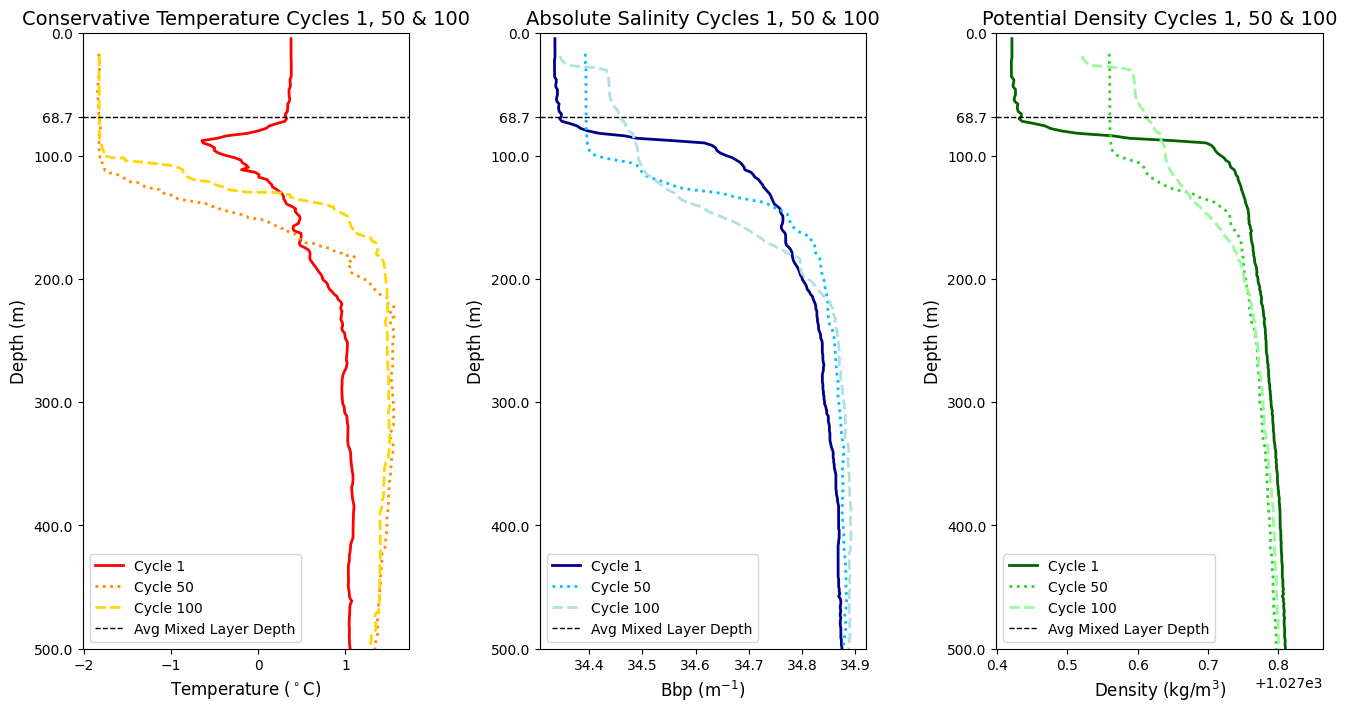

In [359]:
fig = plt.figure(figsize=(16,8))

# plot 1: conservative temperature
ax = fig.add_subplot(131)

x11 = cons_temp_1.iloc[0:548]
x21 = cons_temp_100.iloc[0:548]
x31 = cons_temp_50.iloc[0:548]
y11 = depth_1_pos.iloc[0:548]
y21 = depth_50_pos.iloc[0:548]
y31 = depth_100_pos.iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x11, y11, label = 'Cycle 1', lw=2, c='red')
ax.plot(x21, y21, label = 'Cycle 50', lw=2, c='darkorange', ls =':')
ax.plot(x31, y31, label = 'Cycle 100', lw=2, c='gold', ls ='--')

# adding line for average mixed layer depth
plt.axhline(y=68.67, color='black', linestyle='--', linewidth=1, label = 'Avg Mixed Layer Depth')

current_yticks = list(ax.get_yticks())
new_tick_location = 68.67
new_tick_label = 'Special Value'
updated_yticks = current_yticks + [new_tick_location]
ax.set_yticks(updated_yticks)

ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=12)
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_title('Conservative Temperature Cycles 1, 50 & 100', fontsize=14)
ax.legend()


ax = fig.add_subplot(132)

x12 = abs_sal_1.iloc[0:548]
x22 = abs_sal_50.iloc[0:548]
x32 = abs_sal_100.iloc[0:548]
y12 = depth_1_pos.iloc[0:548]
y22 = depth_50_pos.iloc[0:548]
y32 = depth_100_pos.iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x12, y12, label = 'Cycle 1', lw=2, c='darkblue')
ax.plot(x22, y22, label = 'Cycle 50', lw=2, c='deepskyblue', ls =':')
ax.plot(x32, y32, label = 'Cycle 100', lw=2, c='powderblue', ls ='--')

# adding line for average mixed layer depth
plt.axhline(y=68.67, color='black', linestyle='--', linewidth=1, label = 'Avg Mixed Layer Depth')

current_yticks = list(ax.get_yticks())
new_tick_location = 68.67
new_tick_label = 'Special Value'
updated_yticks = current_yticks + [new_tick_location]
ax.set_yticks(updated_yticks)

ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_title('Absolute Salinity Cycles 1, 50 & 100', fontsize=14)
ax.legend()


ax = fig.add_subplot(133)

ax.set_ylim (0, 500)
ax.invert_yaxis()

x13 = p_density_1.iloc[0:548]
x23 = p_density_50.iloc[0:548]
x33 = p_density_100.iloc[0:548]
y13 = depth_1_pos.iloc[0:548]
y23 = depth_50_pos.iloc[0:548]
y33 = depth_100_pos.iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x13, y13, label = 'Cycle 1', lw=2, c='darkgreen')
ax.plot(x23, y23, label = 'Cycle 50', lw=2, c='limegreen', ls =':')
ax.plot(x33, y33, label = 'Cycle 100', lw=2, c='palegreen', ls ='--')

# adding line for average mixed layer depth
plt.axhline(y=68.67, color='black', linestyle='--', linewidth=1, label = 'Avg Mixed Layer Depth')

current_yticks = list(ax.get_yticks())
new_tick_location = 68.67
new_tick_label = 'Special Value'
updated_yticks = current_yticks + [new_tick_location]
ax.set_yticks(updated_yticks)

ax.set_xlabel(r'Density ($\mathregular{kg/m^3}$)', fontsize=12)
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_title('Potential Density Cycles 1, 50 & 100', fontsize=14)
ax.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.4)

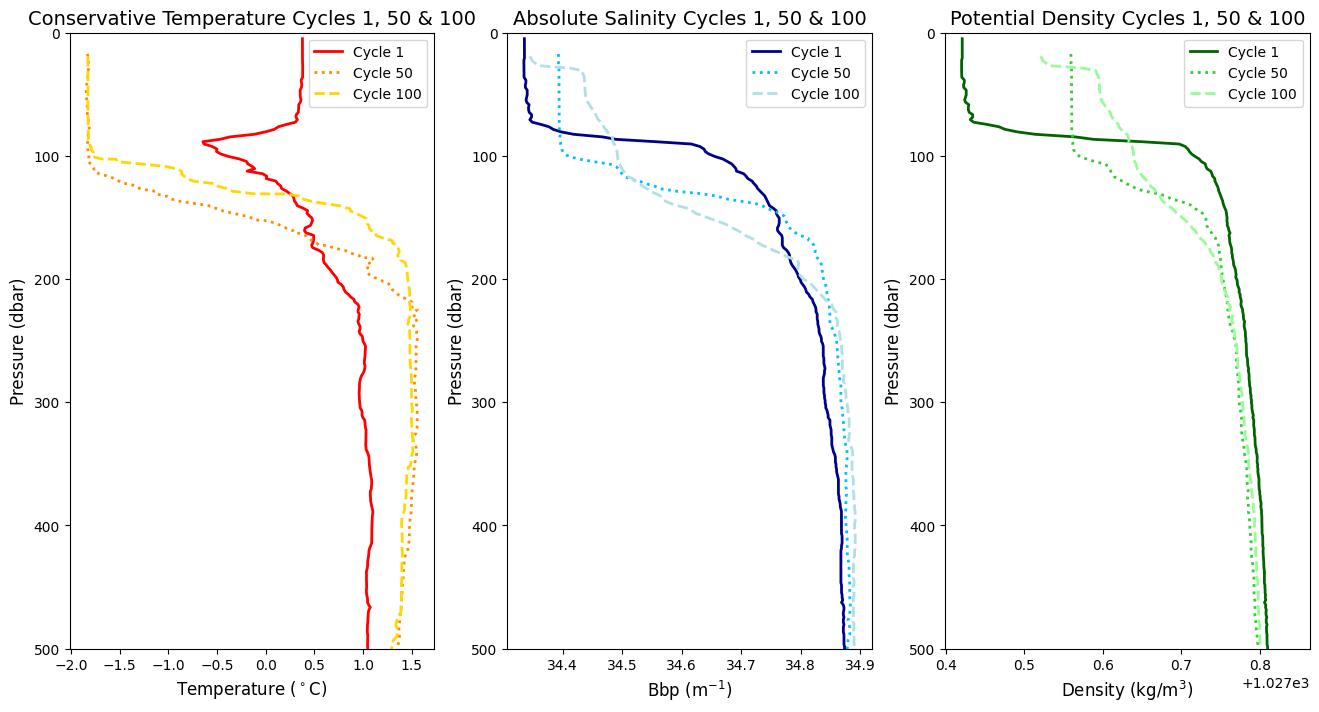

In [323]:
fig = plt.figure(figsize=(16,8))


ax = fig.add_subplot(131)

x11 = cons_temp_1.iloc[0:548]
x21 = cons_temp_100.iloc[0:548]
x31 = cons_temp_50.iloc[0:548]
y11 = multiple_cycles_subset_1['PRES_ADJUSTED'].iloc[0:548]
y21 = multiple_cycles_subset_50['PRES_ADJUSTED'].iloc[0:548]
y31 = multiple_cycles_subset_100['PRES_ADJUSTED'].iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x11, y11, label = 'Cycle 1', lw=2, c='red')
ax.plot(x21, y21, label = 'Cycle 50', lw=2, c='darkorange', ls =':')
ax.plot(x31, y31, label = 'Cycle 100', lw=2, c='gold', ls ='--')

ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Conservative Temperature Cycles 1, 50 & 100', fontsize=14)
ax.legend()


ax = fig.add_subplot(132)

x12 = abs_sal_1.iloc[0:548]
x22 = abs_sal_50.iloc[0:548]
x32 = abs_sal_100.iloc[0:548]
y12 = multiple_cycles_subset_1['PRES_ADJUSTED'].iloc[0:548]
y22 = multiple_cycles_subset_50['PRES_ADJUSTED'].iloc[0:548]
y32 = multiple_cycles_subset_100['PRES_ADJUSTED'].iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x12, y12, label = 'Cycle 1', lw=2, c='darkblue')
ax.plot(x22, y22, label = 'Cycle 50', lw=2, c='deepskyblue', ls =':')
ax.plot(x32, y32, label = 'Cycle 100', lw=2, c='powderblue', ls ='--')


ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Absolute Salinity Cycles 1, 50 & 100', fontsize=14)
ax.legend()


ax = fig.add_subplot(133)

ax.set_ylim (0, 500)
ax.invert_yaxis()

x13 = p_density_1.iloc[0:548]
x23 = p_density_50.iloc[0:548]
x33 = p_density_100.iloc[0:548]
y13 = multiple_cycles_subset_1['PRES_ADJUSTED'].iloc[0:548]
y23 = multiple_cycles_subset_50['PRES_ADJUSTED'].iloc[0:548]
y33 = multiple_cycles_subset_100['PRES_ADJUSTED'].iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x13, y13, label = 'Cycle 1', lw=2, c='darkgreen')
ax.plot(x23, y23, label = 'Cycle 50', lw=2, c='limegreen', ls =':')
ax.plot(x33, y33, label = 'Cycle 100', lw=2, c='palegreen', ls ='--')

ax.set_xlabel(r'Density ($\mathregular{kg/m^3}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Potential Density Cycles 1, 50 & 100', fontsize=14)
ax.legend()

In [337]:
# calculating mixed layer depth for cycle 1!

sigma0_1 = gsw.sigma0(abs_sal_1, cons_temp_1)

# 3. Define MLD threshold (e.g., 0.03 kg/m^3 or 0.125 kg/m^3)
threshold = 0.03

# 4. Define reference depth density (e.g., 10m to avoid diurnal noise)
# Find index closest to 10m
ref_idx = np.argmin(np.abs(multiple_cycles_subset_1['PRES_ADJUSTED'] - 10))
density_ref = sigma0_1.iloc[ref_idx]

# 5. Find depth where density exceeds reference + threshold
mld_index = np.where(sigma0_1 > (density_ref + threshold))[0]

if len(mld_index) > 0:
    mld = multiple_cycles_subset_1['PRES_ADJUSTED'][mld_index[0]]
else:
    mld = multiple_cycles_subset_1['PRES_ADJUSTED'][-1] # MLD deeper than profile

print(f"Mixed Layer Depth: {mld} dbar")
mld_1 = {mld}

Mixed Layer Depth: 74.43 dbar


In [338]:
# calculating mixed layer depth for cycle 50!

sigma0_50 = gsw.sigma0(abs_sal_50, cons_temp_50)

# 3. Define MLD threshold (e.g., 0.03 kg/m^3 or 0.125 kg/m^3)
threshold = 0.03

# 4. Define reference depth density (e.g., 10m to avoid diurnal noise)
# Find index closest to 10m
ref_idx = np.argmin(np.abs(multiple_cycles_subset_50['PRES_ADJUSTED'] - 10))
density_ref = sigma0_50.iloc[ref_idx]

# 5. Find depth where density exceeds reference + threshold
mld_index = np.where(sigma0_50 > (density_ref + threshold))[0]

if len(mld_index) > 0:
    mld = multiple_cycles_subset_50['PRES_ADJUSTED'].iloc[mld_index[0]]
else:
    mld = multiple_cycles_subset_50['PRES_ADJUSTED'][-1] # MLD deeper than profile

print(f"Mixed Layer Depth: {mld} dbar")
mld_50 = {mld}

Mixed Layer Depth: 104.85 dbar


In [339]:
# calculating mixed layer depth for cycle 100!

sigma0_100 = gsw.sigma0(abs_sal_100, cons_temp_100)

# 3. Define MLD threshold (e.g., 0.03 kg/m^3 or 0.125 kg/m^3)
threshold = 0.03

# 4. Define reference depth density (e.g., 10m to avoid diurnal noise)
# Find index closest to 10m
ref_idx = np.argmin(np.abs(multiple_cycles_subset_100['PRES_ADJUSTED'] - 10))
density_ref = sigma0_100.iloc[ref_idx]

# 5. Find depth where density exceeds reference + threshold
mld_index = np.where(sigma0_100 > (density_ref + threshold))[0]

if len(mld_index) > 0:
    mld = multiple_cycles_subset_100['PRES_ADJUSTED'].iloc[mld_index[0]]
else:
    mld = multiple_cycles_subset_100['PRES_ADJUSTED'][-1] # MLD deeper than profile

print(f"Mixed Layer Depth: {mld} dbar")
mld_100 = {mld}

Mixed Layer Depth: 28.77 dbar


In [346]:
all_mld = (74.43, 104.85, 28.77)
np.mean(all_mld)

np.float64(69.35000000000001)

In [354]:
print('cycle 1', np.mean(multiple_cycles_subset_1['LATITUDE']))
print('cycle 50', np.mean(multiple_cycles_subset_50['LATITUDE']))
print('cycle 100', np.mean(multiple_cycles_subset_100['LATITUDE']))
print('all cycles mean', np.mean([-63.955100000000016, -63.224000000000004, -62.35300000000001]))

cycle 1 -63.955100000000016
cycle 50 -63.224000000000004
cycle 100 -62.35300000000001
all cycles mean -63.17736666666667


In [340]:
# calculating average mixed layer depth in meters from dbar for cycle 1
p = 74.43  # dbar
lat = -63.955100000000016 # degrees

# Calculate depth (positive up, so negative value)
depth = gsw.z_from_p(p, lat)

# To get positive depth in meters
meters = -depth  
print(f"{p} dbar is approximately {meters:.2f} m at {lat} degrees latitude.")
# Output: 1000.0 dbar is approximately 991.60 m at 30.0 degrees latitude.

74.43 dbar is approximately 73.69 m at -63.955100000000016 degrees latitude.


In [347]:
# calculating average mixed layer depth in meters from dbar for cycle 50
p = 104.85  # dbar
lat = -63.224000000000004 # degrees

# Calculate depth (positive up, so negative value)
depth = gsw.z_from_p(p, lat)

# To get positive depth in meters
meters = -depth  
print(f"{p} dbar is approximately {meters:.2f} m at {lat} degrees latitude.")
# Output: 1000.0 dbar is approximately 991.60 m at 30.0 degrees latitude.

104.85 dbar is approximately 103.81 m at -63.224000000000004 degrees latitude.


In [356]:
# calculating average mixed layer depth in meters from dbar for average of all cycles
p = 69.35000000000001 # dbar
lat = -63.17736666666667 # degrees

# Calculate depth (positive up, so negative value)
depth = gsw.z_from_p(p, lat)

# To get positive depth in meters
meters = -depth  
print(f"{p} dbar is approximately {meters:.2f} m at {lat} degrees latitude.")
# Output: 1000.0 dbar is approximately 991.60 m at 30.0 degrees latitude.

69.35000000000001 dbar is approximately 68.67 m at -63.17736666666667 degrees latitude.


In [348]:
# calculating average mixed layer depth in meters from dbar for cycle 100
p = 28.77  # dbar
lat = -62.35300000000001 # degrees

# Calculate depth (positive up, so negative value)
depth = gsw.z_from_p(p, lat)

# To get positive depth in meters
meters = -depth  
print(f"{p} dbar is approximately {meters:.2f} m at {lat} degrees latitude.")
# Output: 1000.0 dbar is approximately 991.60 m at 30.0 degrees latitude.

28.77 dbar is approximately 28.49 m at -62.35300000000001 degrees latitude.
